In [ ]:

# 必要なライブラリをインストール
!pip install -q trimesh matplotlib numpy scipy rtree shapely pyvista panel vtk ipyvtklink jupyter_bokeh
!apt-get update -y && apt-get install -y libgl1-mesa-glx xvfb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.7/779.7 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.6/708.6 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 8.1 MB/s eta 0:00:00
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-securi

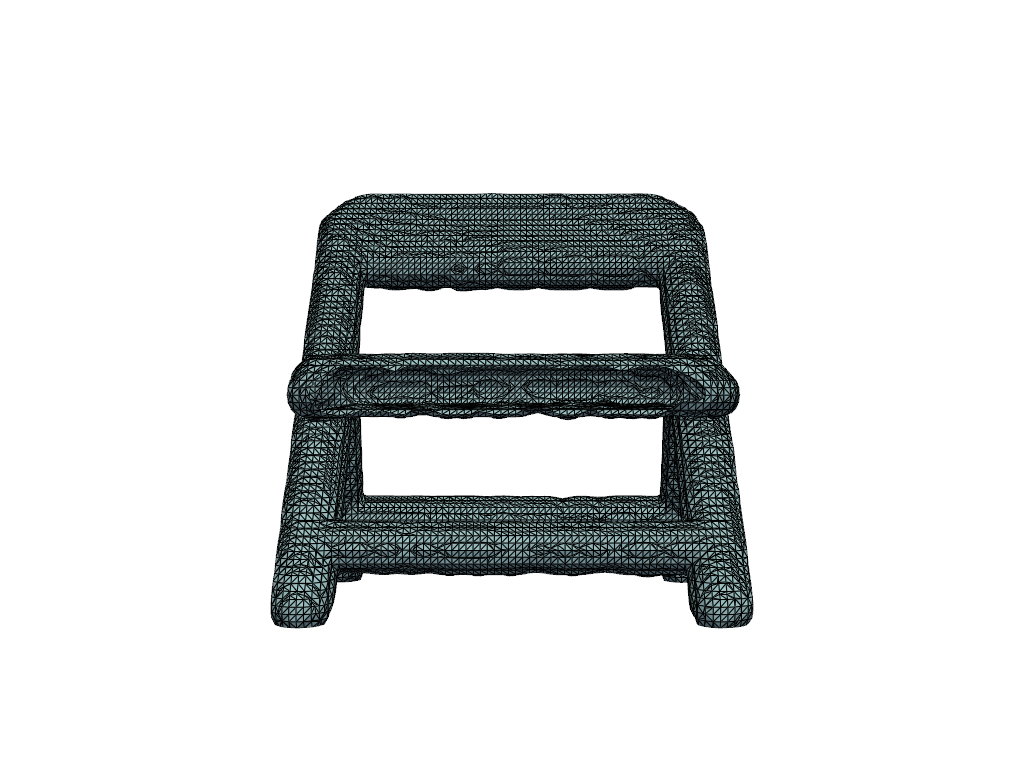

In [ ]:
import os
import numpy as np
import trimesh
import plotly.graph_objects as go
import pyvista as pv
import panel as pn
from scipy.ndimage import gaussian_filter
from skimage import measure

# PyVistaの設定（Colab用）
pn.extension('vtk')
pv.start_xvfb()

# メッシュをロード
mesh_path = "/content/drive/MyDrive/chair/chair_0001.off"
if not os.path.exists(mesh_path):
    raise FileNotFoundError(f"メッシュファイルが見つかりません: {mesh_path}")

mesh = trimesh.load_mesh(mesh_path)

# 点群を取得
num_samples = 10000
points, _ = trimesh.sample.sample_surface(mesh, num_samples)

# Plotlyで点群を可視化
fig = go.Figure(data=[go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], mode='markers')])
fig.show()

# Voxel Gridの解像度設定
voxel_grid_size = 64
padding = 2
new_size = voxel_grid_size + 2 * padding

# 空のボクセルグリッドを作成
voxel_grid = np.zeros((new_size, new_size, new_size))

# 座標を[0,1]に正規化
points_min = points.min(axis=0)
points_max = points.max(axis=0)
points_scaled = (points - points_min) / (points_max - points_min)
# Plotlyで点群を可視化
fig = go.Figure(data=[go.Scatter3d(x=points_scaled[:, 0], y=points_scaled[:, 1], z=points_scaled[:, 2], mode='markers')])
fig.show()
# Voxel Gridへの投影
indices = (points_scaled * (voxel_grid_size - 1)).astype(int)
indices += padding
voxel_grid[indices[:, 0], indices[:, 1], indices[:, 2]] = 1

# ガウス平滑化による密度場の生成
density_field = gaussian_filter(voxel_grid, sigma=1.0)

# Marching Cubesでメッシュ化
verts, faces, normals, _ = measure.marching_cubes(density_field, level=0.001)
faces_pv = np.hstack((np.full((faces.shape[0], 1), 3), faces))
reconstructed_mesh = pv.PolyData(verts, faces_pv)

# PyVistaで可視化
plotter = pv.Plotter(notebook=True)
plotter.add_mesh(reconstructed_mesh, color='lightblue', show_edges=True)
plotter.view_xz()
plotter.show(jupyter_backend='panel')

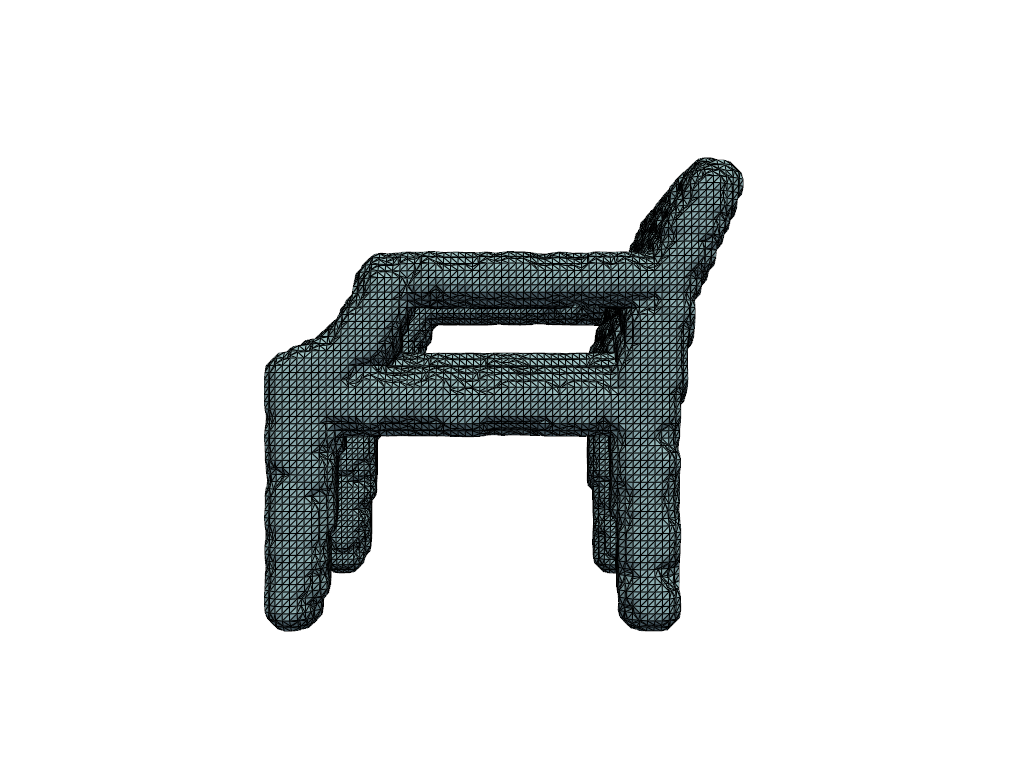

In [ ]:
import os
import numpy as np
import trimesh
import plotly.graph_objects as go
import pyvista as pv
import panel as pn
from scipy.ndimage import gaussian_filter
from skimage import measure

# PyVistaの設定（Colab用）
pn.extension('vtk')
pv.start_xvfb()

# メッシュをロード
mesh_path = "/content/drive/MyDrive/chair/chair_0005.off"
if not os.path.exists(mesh_path):
    raise FileNotFoundError(f"メッシュファイルが見つかりません: {mesh_path}")

mesh = trimesh.load_mesh(mesh_path)

# 点群を取得
num_samples = 10000
points, _ = trimesh.sample.sample_surface(mesh, num_samples)

# Plotlyで点群を可視化
fig = go.Figure(data=[go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], mode='markers')])
fig.show()

# Voxel Gridの解像度設定
voxel_grid_size = 64
padding = 10
new_size = voxel_grid_size + 2 * padding

# 空のボクセルグリッドを作成
voxel_grid = np.zeros((new_size, new_size, new_size))

# 座標を[0,1]に正規化
points_min = points.min(axis=0)
points_max = points.max(axis=0)
points_scaled = (points - points_min) / (points_max - points_min)
# Plotlyで点群を可視化
fig = go.Figure(data=[go.Scatter3d(x=points_scaled[:, 0], y=points_scaled[:, 1], z=points_scaled[:, 2], mode='markers')])
fig.show()
# Voxel Gridへの投影
indices = (points_scaled * (voxel_grid_size - 1)).astype(int)
indices += padding
voxel_grid[indices[:, 0], indices[:, 1], indices[:, 2]] = 1

# ガウス平滑化による密度場の生成
density_field = gaussian_filter(voxel_grid, sigma=0.8)

# Marching Cubesでメッシュ化
verts, faces, normals, _ = measure.marching_cubes(density_field, level=0.001)
faces_pv = np.hstack((np.full((faces.shape[0], 1), 3), faces))
reconstructed_mesh = pv.PolyData(verts, faces_pv)

# PyVistaで可視化
plotter = pv.Plotter(notebook=True)
plotter.add_mesh(reconstructed_mesh, color='lightblue', show_edges=True)
plotter.view_yz()
plotter.show(jupyter_backend='panel')
